In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")

In [2]:
df = pd.read_csv('../data/merged_interpolated.csv')
df.datetime = df.datetime.astype('datetime64')
df.head()

,datetime,tempc,cloud8,windk,wdir,humid,rainmm,radkjm2,pv_est,net_load,total_load
0,2018-03-06 09:30:00,20.75,2.5,14.5,135.0,44.5,0.0,1915.0,318.991,1288,1136.79
1,2018-03-06 10:00:00,21.50,1.0,16.0,140.0,40.0,0.0,2340.0,375.231,1237,1054.87
2,2018-03-06 10:30:00,22.25,1.5,15.5,145.0,37.0,0.0,2570.0,430.909,1189,1002.35
3,2018-03-06 11:00:00,23.00,2.0,15.0,150.0,34.0,0.0,2800.0,485.129,1150,971.54
4,2018-03-06 11:30:00,23.55,2.0,13.0,145.0,32.0,0.0,2945.0,523.989,1122,943.68


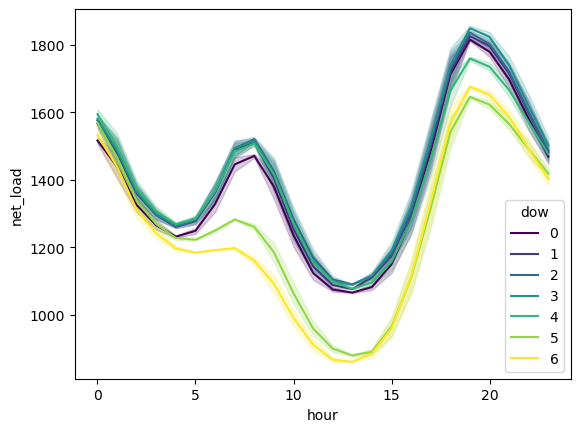

In [3]:
def profiler(data, datetime_col, profile_col):
    df = data.copy().sort_values(datetime_col)
    dt = data[datetime_col].dt
    df['hour'] = dt.hour
    df['minute'] = dt.minute
    grouped = df.groupby(['hour', 'minute'])[[profile_col]].mean()
    sns.lineplot(x='hour', y=profile_col, data=grouped)
    return grouped

def dow_profiler(data, datetime_col, profile_col, palette='viridis'):
    df = data.copy().sort_values(datetime_col)
    dt = data[datetime_col].dt
    df['dow'] = dt.day_of_week
    df['hour'] = dt.hour
    df['minute'] = dt.minute
    grouped = df.groupby(['dow', 'hour', 'minute'])[[profile_col]].mean()
    sns.lineplot(x='hour', y=profile_col, data=grouped, hue='dow', 
                 palette=sns.color_palette(palette, as_cmap=True))
    
dow_profiler(df, 'datetime', 'net_load')

In [16]:
df.sort_values('datetime', inplace=True)
dt = df['datetime'].dt
df['year'] = dt.year
df['dow'] = dt.day_of_week
df['hour'] = dt.hour
df['minute'] = dt.minute
grouped = df.groupby(['year', 'dow', 'hour', 'minute'])[['net_load']].mean()
grouped

net_load
year dow hour minute             
2018 0   0    0       1534.465116
              30      1497.279070
         1    0       1444.488372
              30      1365.000000
         2    0       1303.395349
...                           ...
2023 6   21   30      1514.800000
         22   0       1466.200000
              30      1414.500000
         23   0       1374.200000
              30      1344.100000

[2016 rows x 1 columns]

<Axes: xlabel='hour', ylabel='net_load'>

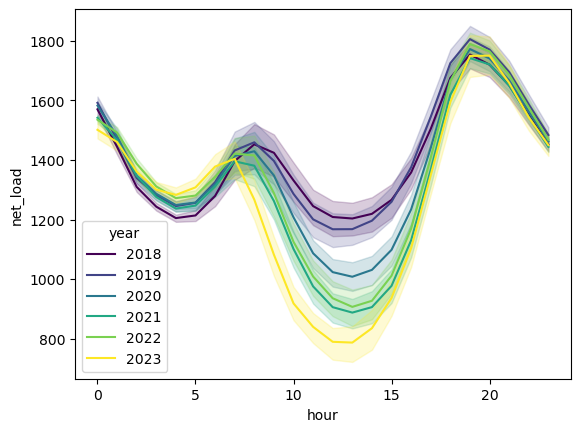

In [10]:
sns.lineplot(x='hour', y='net_load', data=grouped, hue='year', palette=sns.color_palette('viridis', as_cmap=True))

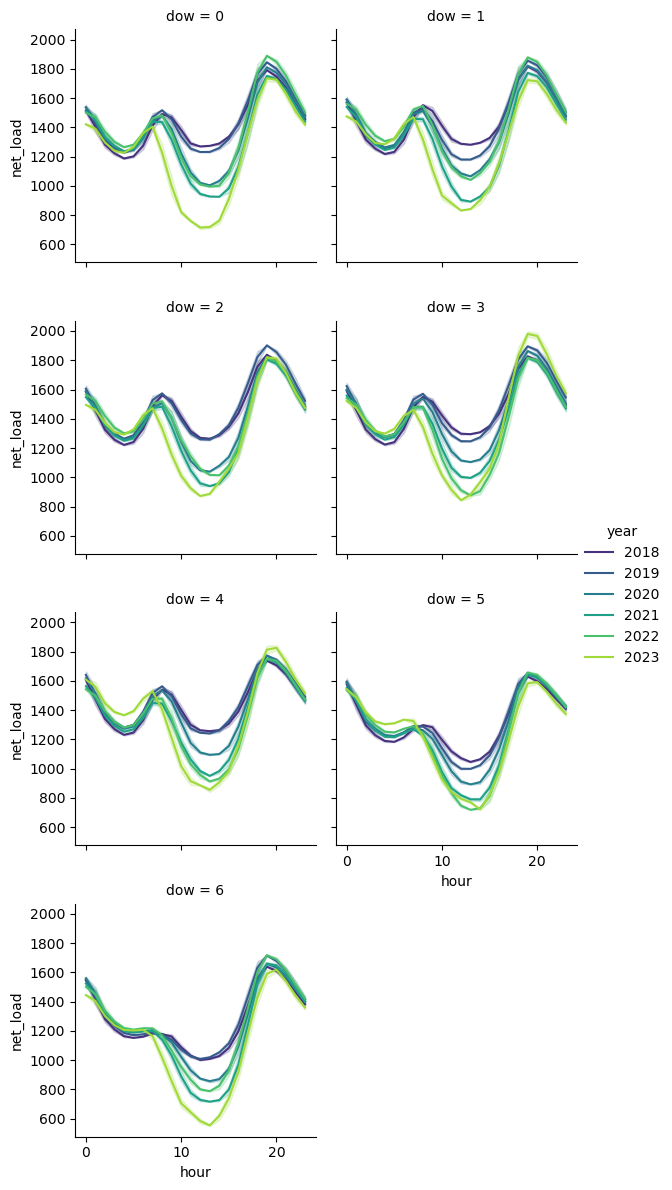

In [23]:
g = sns.FacetGrid(grouped.reset_index(), col='dow', col_wrap=2, 
                  hue='year', palette='viridis')
g.map(sns.lineplot, 'hour', 'net_load')
g.add_legend()

In [24]:
df['month'] = dt.month
grouped = df.groupby(['year', 'month', 'dow', 'hour', 'minute'])[['net_load']].mean()
grouped

net_load
year month dow hour minute             
2018 3     0   0    0       1461.333333
                    30      1415.666667
               1    0       1361.333333
                    30      1286.666667
               2    0       1245.333333
...                                 ...
2023 3     6   21   30      1433.000000
               22   0       1405.000000
                    30      1360.000000
               23   0       1355.000000
                    30      1334.000000

[20496 rows x 1 columns]

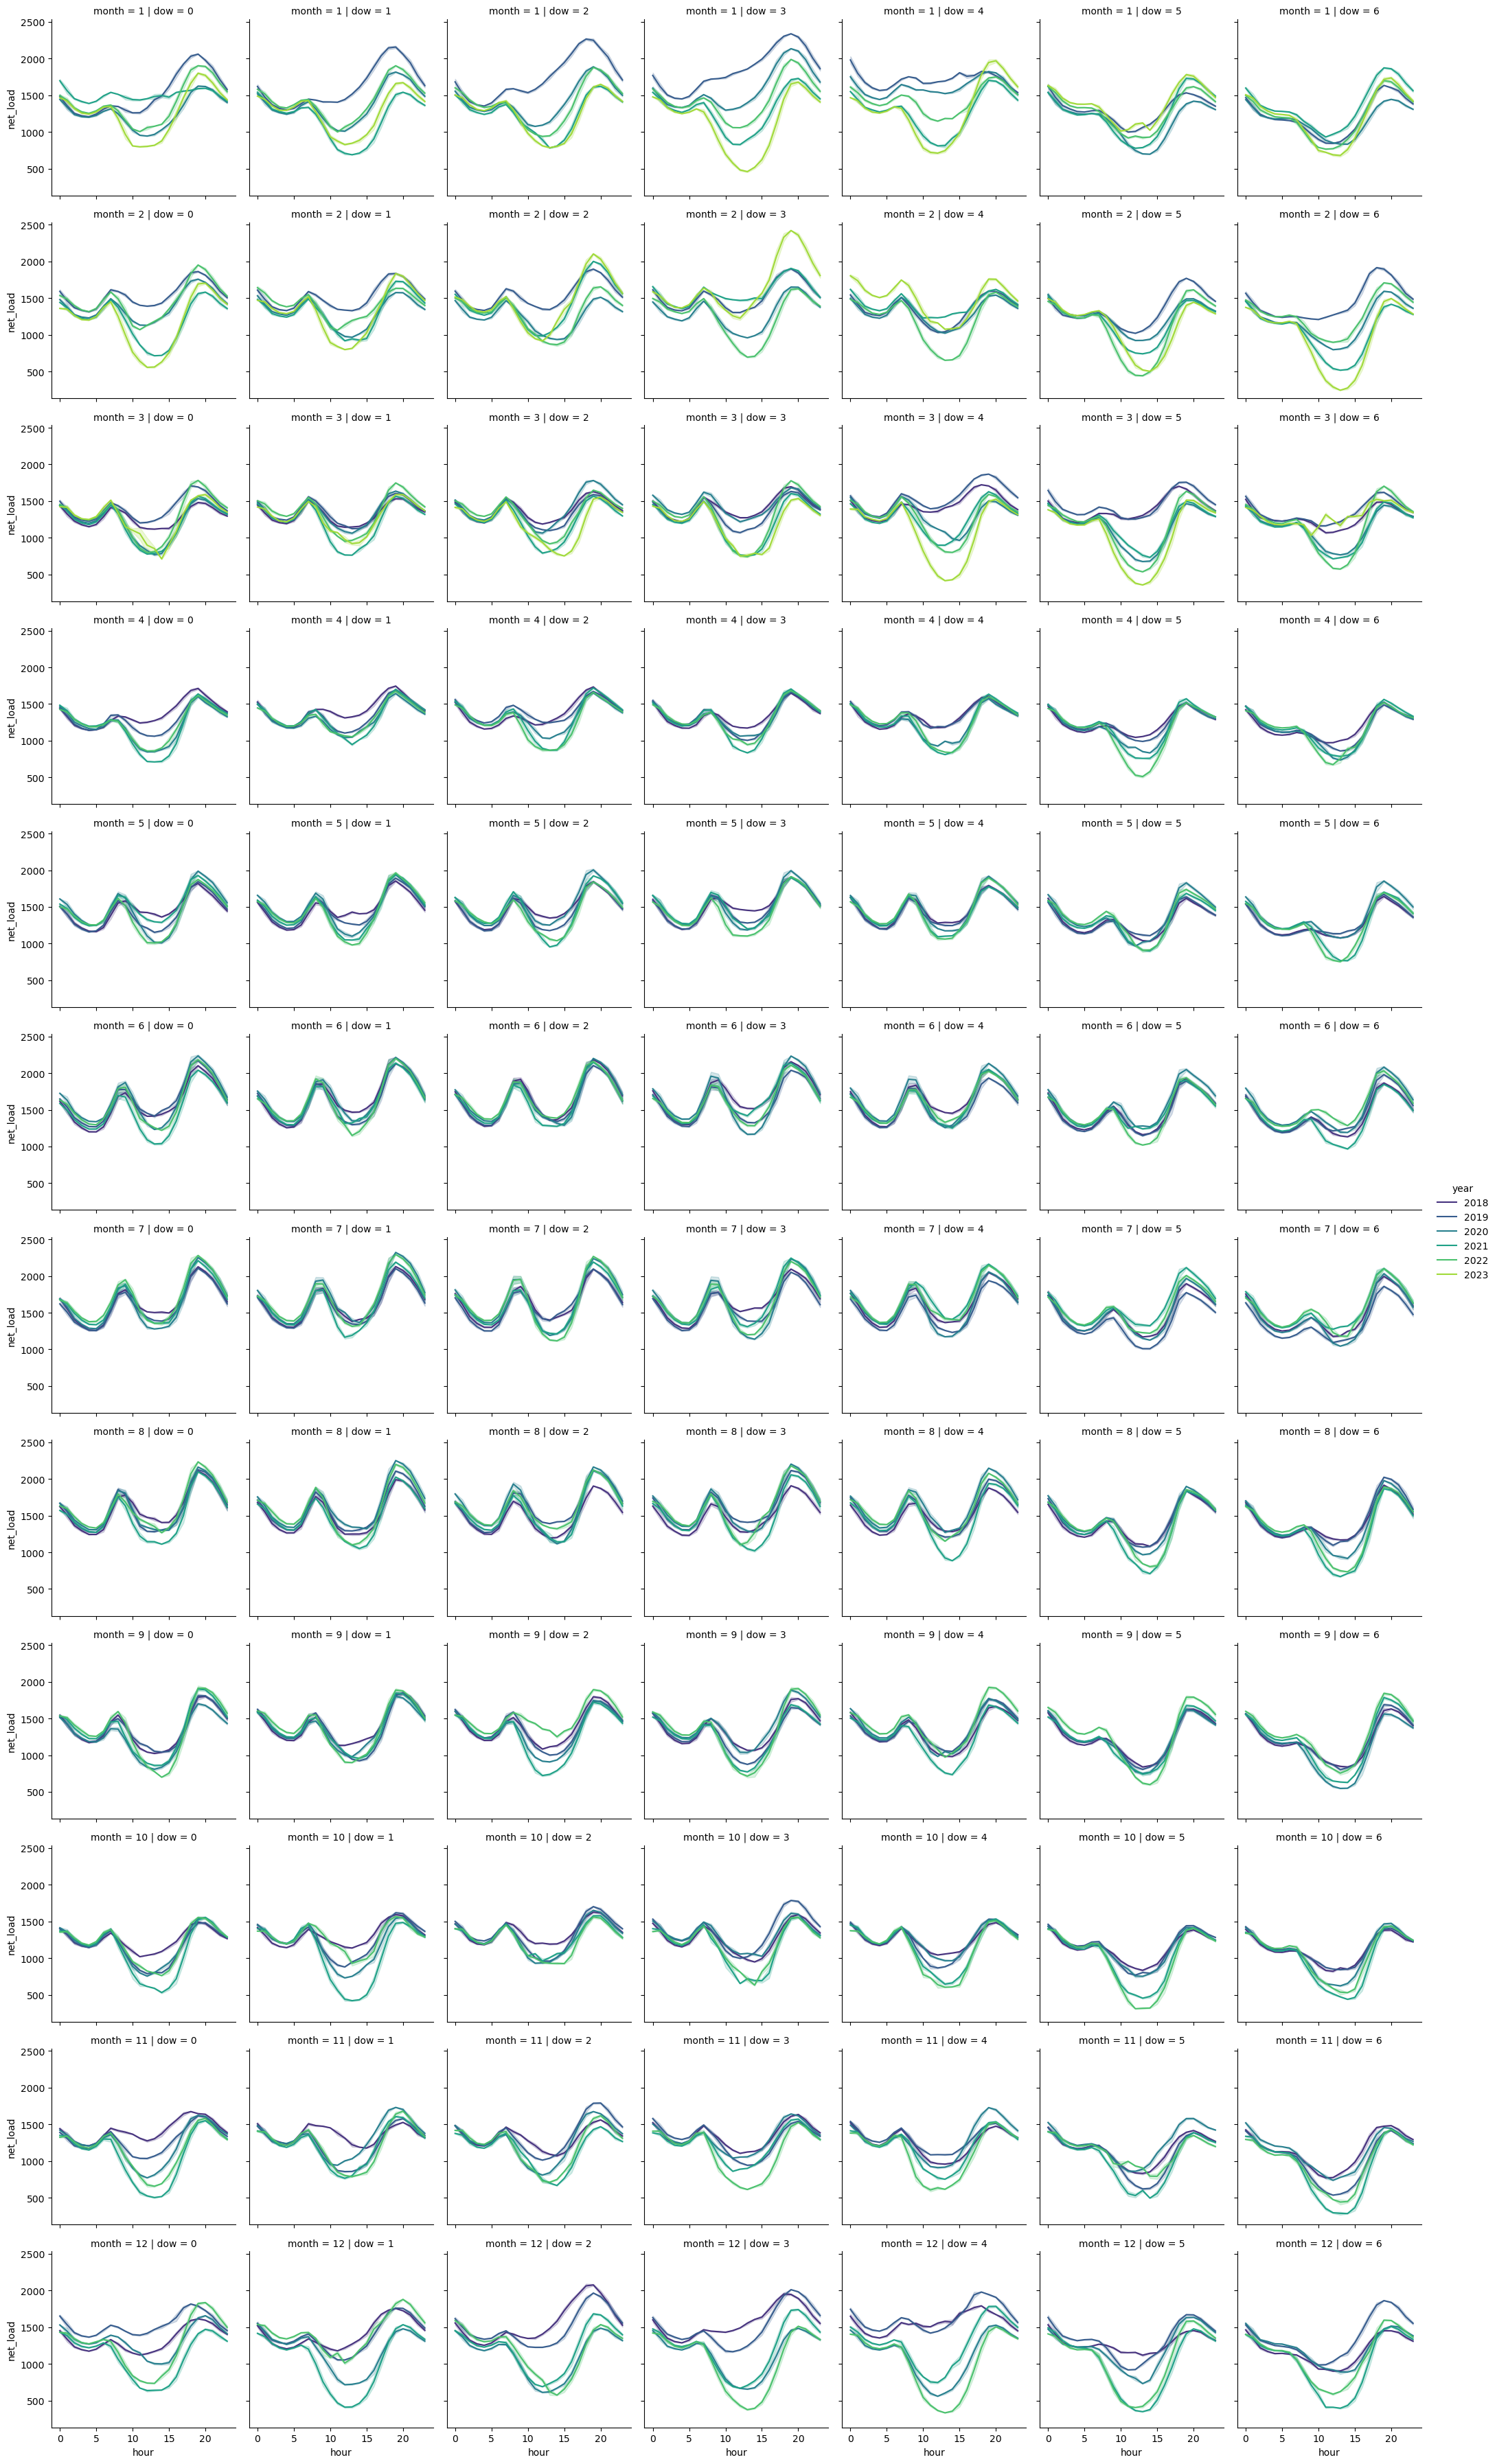

In [25]:
g = sns.FacetGrid(grouped.reset_index(), row='month', col='dow',
                  hue='year', palette='viridis')
g.map(sns.lineplot, 'hour', 'net_load')
g.add_legend()